## Disclaimer
In this whole project, we use color blind friendly graphical elements in order to minimise discrimination. 

In [42]:
# Data manipulation
import pandas as pd
import numpy as np
import scipy as stats

# Plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.imputation.mice import MICE, MICEData
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
import time
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier 
 
# Import this to silence a warning when converting data column of a dataframe on the fly
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Train-Test Splitting
from sklearn.model_selection import train_test_split

#For Standardisation 
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import PCA

#(to ignore warnings if needed)
#import warnings
#warnings.filterwarnings('ignore') 

sns.set()

%matplotlib inline

## 1. Load Data

We are loading the every csv file separately from the Data folder in the project directory. Once we have stored them in our Notebook we merge them together to form a larger dataframe containing all the information we have available.

In [43]:
df_2014 = pd.read_csv('Data/2014_Financial_Data.csv')
df_2014.rename(columns={df_2014.columns[0]:'Tickers'}, inplace=True)
df_2014 = pd.concat([pd.Series(df_2014['Tickers']).apply(lambda x: f'{x}-2014'), df_2014.iloc[:,1:]], axis=1)
df_2014.set_index('Tickers')

df_2015 = pd.read_csv('Data/2015_Financial_Data.csv')
df_2015.rename(columns={df_2015.columns[0]:'Tickers'}, inplace=True)
df_2015 = pd.concat([pd.Series(df_2015['Tickers']).apply(lambda x: f'{x}-2015'), df_2015.iloc[:,1:]], axis=1)
df_2015.set_index('Tickers')

df_2016 = pd.read_csv('Data/2016_Financial_Data.csv')
df_2016.rename(columns={df_2016.columns[0]:'Tickers'}, inplace=True)
df_2016 = pd.concat([pd.Series(df_2016['Tickers']).apply(lambda x: f'{x}-2016'), df_2016.iloc[:,1:]], axis=1)
df_2016.set_index('Tickers')

df_2017 = pd.read_csv('Data/2017_Financial_Data.csv')
df_2017.rename(columns={df_2017.columns[0]:'Tickers'}, inplace=True)
df_2017 = pd.concat([pd.Series(df_2017['Tickers']).apply(lambda x: f'{x}-2017'), df_2017.iloc[:,1:]], axis=1)
df_2017.set_index('Tickers')

df_2018 = pd.read_csv('Data/2018_Financial_Data.csv')
df_2018.rename(columns={df_2018.columns[0]:'Tickers'}, inplace=True)
df_2018 = pd.concat([pd.Series(df_2018['Tickers']).apply(lambda x: f'{x}-2018'), df_2018.iloc[:,1:]], axis=1)
df_2018.set_index('Tickers')


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
Tickers,,,,,,,,,,,,,,,,,,,,,
CMCSA-2018,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
KMI-2018,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
INTC-2018,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
MU-2018,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,1.430300e+10,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
GE-2018,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,-2.177200e+10,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YRIV-2018,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,-1.482451e+07,...,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,Real Estate,-90.962099,0
YTEN-2018,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,-9.170000e+06,...,0.3445,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,Basic Materials,-77.922077,0
ZKIN-2018,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,8.416324e+06,...,0.1605,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,Basic Materials,-17.834400,0


Now we add new YEAR column to each of the dataframes to later being able to group the rows by their year. We add them to an array, so we can iterate over them.

In [44]:
df_2014['year'] = '2014'
df_2015['year'] = '2015'
df_2016['year'] = '2016'
df_2017['year'] = '2017'
df_2018['year'] = '2018'

dataframes = [df_2014, df_2015, df_2016, df_2017, df_2018]

# 2. Merging of datasets

In [45]:
for df in dataframes:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Columns: 226 entries, Tickers to year
dtypes: float64(222), int64(1), object(3)
memory usage: 6.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Columns: 226 entries, Tickers to year
dtypes: float64(222), int64(1), object(3)
memory usage: 7.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4797 entries, 0 to 4796
Columns: 226 entries, Tickers to year
dtypes: float64(222), int64(1), object(3)
memory usage: 8.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Columns: 226 entries, Tickers to year
dtypes: float64(222), int64(1), object(3)
memory usage: 8.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Columns: 226 entries, Tickers to year
dtypes: float64(222), int64(1), object(3)
memory usage: 7.6+ MB
None


We can see that the datasets are quite similar. The only thing that varies between them is the number of rows. As we want to append all the datasets to form a bigger dataset we expect 3808 + 4120 + 4797 + 4960 + 4392 = 22'077 rows in the generated dataset.

Looking at the column data types we have:
- 222 numeric (financial indicators)
- 1 integer (the **class** column)
- 2 objects (**Sector and Price Change** column)

In order to be able to append all the dataframes together we have to make sure all the columns have the same naming. It looks like the only column that is named differently from all the others across the datasets is the price change column. We are renaming it to 'PRICE CHANGE [%]'.


In [46]:
year = 2015
for df in dataframes:
    df.rename(columns = {f'{year} PRICE VAR [%]': 'PRICE CHANGE [%]'}, inplace=True)
    year += 1

To check our assumption and see if now all the columns really are the same we use the numpy array_equal function.

In [47]:
columns_2014 = df_2014.columns.values.tolist()
columns_2015 = df_2015.columns.values.tolist()
columns_2016 = df_2016.columns.values.tolist()
columns_2017 = df_2017.columns.values.tolist()
columns_2018 = df_2018.columns.values.tolist()

print(f'Columns in df 2014 and 2015 are equal: {np.array_equal(columns_2014, columns_2015)}')
print(f'Columns in df 2015 and 2016 are equal: {np.array_equal(columns_2015, columns_2016)}')
print(f'Columns in df 2016 and 2017 are equal: {np.array_equal(columns_2016, columns_2017)}')
print(f'Columns in df 2017 and 2018 are equal: {np.array_equal(columns_2017, columns_2018)}')

Columns in df 2014 and 2015 are equal: True
Columns in df 2015 and 2016 are equal: True
Columns in df 2016 and 2017 are equal: True
Columns in df 2017 and 2018 are equal: True


As we see that all computations output TRUE. By reflexivity we know that the columns of all the datasets now have the same values. Now we can start appending them to form the mega-dataset we want to start working with.

In [48]:
df = pd.concat(dataframes)
df

,Tickers,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,PRICE CHANGE [%],Class,year
0,PG-2014,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0,2014
1,VIPS-2014,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0,2014
2,KR-2014,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1,2014
3,RAD-2014,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1,2014
4,GIS-2014,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,YRIV-2018,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,...,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,Real Estate,-90.962099,0,2018
4388,YTEN-2018,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,...,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,Basic Materials,-77.922077,0,2018
4389,ZKIN-2018,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,...,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,Basic Materials,-17.834400,0,2018
4390,ZOM-2018,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,...,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,Industrials,-73.520000,0,2018


As expected we get a new dataframe with 22'077 entries and the common number of columns (225) of the individual datasets.

In [49]:
df_calc = df[['Tickers','year', 'PRICE CHANGE [%]']].copy()

# we define function to map the values
def set_value(row_number, assigned_value):
    return assigned_value[row_number]

# we create a dictionary  
event_dictionary ={'2014' : -0.73, '2015' : 9.54, '2016' : 19.42, '2017' : -6.24, '2018' : 28.88}
  
# we add a new column named 'sp500_1'
df_calc['SP500_1'] = df_calc['year'].apply(set_value, args =(event_dictionary, ))

df_calc.head()

,Tickers,year,PRICE CHANGE [%],SP500_1
0,PG-2014,2014,-9.323276,-0.73
1,VIPS-2014,2014,-25.512193,-0.73
2,KR-2014,2014,33.118297,-0.73
3,RAD-2014,2014,2.752291,-0.73
4,GIS-2014,2014,12.897715,-0.73


now we need to create a column yielding buy, hold and sell which will then be treated as our response value. 

In [50]:

df_calc["DIFFERENCE"] = df_calc["PRICE CHANGE [%]"] - df_calc["SP500_1"]

conditions = [
    (df_calc['DIFFERENCE'] < -2.5),
    (df_calc['DIFFERENCE'] > 2.5),
    (df_calc['DIFFERENCE'] >= 9 -2.5) & (df_calc['DIFFERENCE'] <= 2.5)
    ]

values = [-1, 1, 0]

df_calc['STRATEGY'] = np.select(conditions, values)


df_strategy = df_calc[['Tickers', 'STRATEGY']].copy()
df_strategy.head()

,Tickers,STRATEGY
0,PG-2014,-1
1,VIPS-2014,-1
2,KR-2014,1
3,RAD-2014,1
4,GIS-2014,1


Now we join the strategy dataframe with the the main dataframe and drop the column price change so that we will by no chance include it in our baseline

In [51]:

df = df.set_index('Tickers').join(df_strategy.set_index('Tickers'))
df = df.drop('PRICE CHANGE [%]', 1)
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class,year,STRATEGY
Tickers,,,,,,,,,,,,,,,,,,,,,
PG-2014,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,...,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,0,2014,-1
VIPS-2014,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,0,2014,-1
KR-2014,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,...,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,1,2014,1
RAD-2014,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,2.502180e+08,...,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,1,2014,1
GIS-2014,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,2.707700e+09,...,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,1,2014,1


## Looking at data
We use a summary statistics to get a summary overview of our dataset before we work with it. We also look at the distribution of the data by drawing some boxplots and check whether the dataset is balanced by inspecting the column "Sector" that shows how many firms are in each industry. 

In [52]:
df.describe()


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Class,STRATEGY
count,2.090600e+04,19989.000000,2.030600e+04,2.087000e+04,1.993900e+04,2.040800e+04,2.037500e+04,2.097600e+04,2.035800e+04,2.071300e+04,...,18264.000000,19952.000000,19650.000000,19690.000000,19213.000000,19462.000000,19598.000000,19655.000000,22077.000000,22077.000000
mean,5.161619e+09,3.622214,3.258565e+09,1.970452e+09,1.033333e+08,8.699279e+08,1.368670e+09,5.896979e+08,9.778939e+07,4.925003e+08,...,0.012298,10.978239,0.158858,1.134221,0.783208,3.733922,0.295610,0.365149,0.550754,-0.153871
std,3.197314e+10,312.648170,2.583092e+10,8.735750e+09,7.676062e+08,3.804283e+09,5.662984e+09,2.976454e+09,4.996543e+08,2.484345e+09,...,0.263079,1101.098165,3.268154,45.381079,66.524006,174.864701,12.974127,15.030054,0.497429,0.952969
min,-6.276160e+08,-12.769300,-2.986888e+09,-1.280800e+10,-1.098000e+08,-1.401594e+08,-5.495512e+09,-1.933900e+10,-1.710954e+09,-2.177200e+10,...,-1.000000,-1.000000,-1.000000,-1.000000,-3963.131200,-1.051000,-2.662200,-2.369900,0.000000,-1.000000
25%,5.880737e+07,-0.014700,3.211750e+06,3.035575e+07,0.000000e+00,1.768550e+07,3.564150e+07,-4.433750e+06,0.000000e+00,-8.745000e+06,...,0.000000,-0.051125,0.000000,-0.031075,-0.103800,-0.067475,0.000000,-0.013700,0.000000,-1.000000
50%,4.352510e+08,0.057600,1.530115e+08,1.943525e+08,0.000000e+00,8.062450e+07,1.564000e+08,3.585350e+07,3.697000e+06,2.380000e+07,...,0.000000,0.009500,0.000000,0.048000,0.032400,0.000000,0.000000,0.061000,1.000000,-1.000000
75%,2.287259e+09,0.182400,1.180224e+09,8.806035e+08,1.220150e+07,3.699722e+08,6.210870e+08,2.554363e+08,4.969325e+07,1.964680e+08,...,0.040000,0.200550,0.058400,0.176800,0.142100,0.150075,0.000000,0.185350,1.000000,1.000000
max,1.886894e+12,42138.663900,1.581527e+12,4.621600e+11,2.883700e+10,1.856830e+11,3.056050e+11,1.565540e+11,3.152300e+10,8.720500e+10,...,5.400500,153332.333300,293.473000,5468.426400,7039.325900,17646.823500,1542.611000,2042.000000,1.000000,1.000000


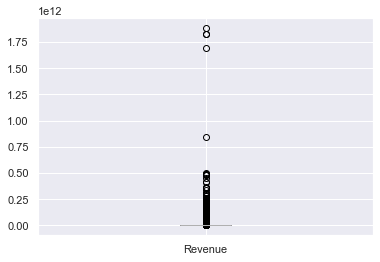

In [53]:
boxplot = df.boxplot(column=["Revenue"])  

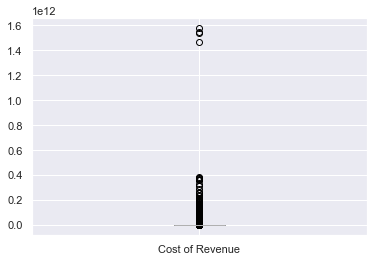

In [54]:
boxplot = df.boxplot(column=["Cost of Revenue"])  

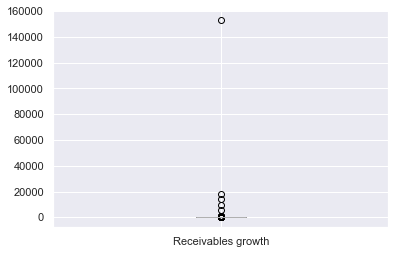

In [55]:
boxplot = df.boxplot(column=["Receivables growth"])

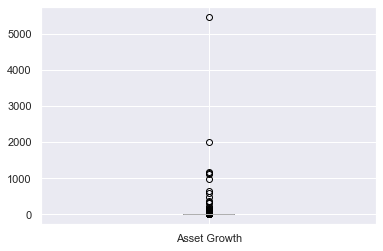

In [56]:
boxplot = df.boxplot(column=["Asset Growth"])

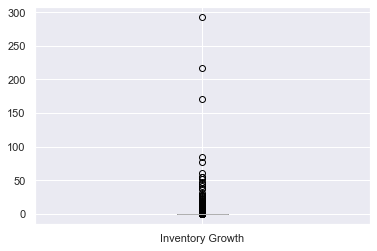

In [57]:
boxplot = df.boxplot(column=["Inventory Growth"])

We see that for the 5 columns that we (randomly) choose to look at, the data is well distributed around a centre, but there are some outliers, and as points might be below zero, this could indicate that there are potential missies filled as -1. Thus, right after splitting the data, in a next step, we will clean the data.

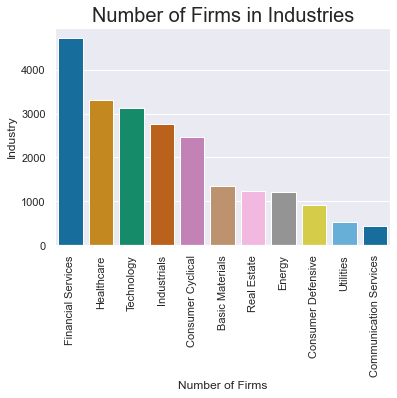

In [58]:
sectors = df['Sector'].unique().tolist()


df_sector = df['Sector'].value_counts()
sns.barplot(x=np.arange(len(df_sector)), y=df_sector, palette = 'colorblind')
plt.xticks(np.arange(len(df_sector)), df_sector.index.values.tolist(), rotation=90)
plt.xlabel("Number of Firms")
plt.ylabel("Industry")
plt.title('Number of Firms in Industries', fontsize=20)
plt.show()

As we see our dataset is unbalanced in regards to the sector count. This can lead to overfitting, but we will leave the data as is as it represents the true distribution of sectors in reality. However, we will need to keep this in mind for our baseline.

# 3. Splitting Data into Training, Test, and Validation Set

(NRY)We begin by splitting our data into a training, test, and a validation set. The purpose of this is not to let any information of the test data set spill over onto our algorithm (e.g., when we fill the outliers with the mean of the whole dataset instead of the mean of the training dataset).()  

Realistically, we want our model to be able to predict for the following year. Therefore, we are working with time series data. If we randomly split our dataset, then we already leak some information from the test data to the train dataset. This is because stocks performance does depend on the year and if we have the same years in train and test dataset then our model will already have some knowledge of how well the stocks perform. In reality, we will want to predict the strategy for a coming year where we do not have knowledge, whether this year will turn out to be good or not. For this reason we split our dataset as follows: Training: The first 3 years, Validation: The fourth year, Test: The last year. 
This split will definitely make us have a lower test accuracy, as it is more difficult, but it is the only way to truthfully capture the real world situation. Note that we can also not do cross validation in this setting as we need to keep the order of the years and that is the reason why we only have one validation set. Also note that for predicting on the test set we will fit the model on the first four years(=training + validation) while for predicting on the validation set we will only use the first three years(=training).

In [59]:
df['sectorFac'] = df.Sector.factorize()[0] 
df = df.drop('Sector', 1).copy()

In [60]:
df_train = df.loc[(df['year'] != "2017") & (df['year'] != "2018")].copy()
df_valid = df.loc[df['year'] == "2017"].copy()
df_test = df.loc[df['year'] == "2018"].copy()

X_train = df_train.drop(columns = ['STRATEGY']).copy()
y_train = df_train['STRATEGY']
X_valid = df_valid.drop(columns = ['STRATEGY']).copy()
y_valid = df_valid['STRATEGY']
X_test = df_test.drop(columns = ['STRATEGY']).copy()
y_test = df_test['STRATEGY']
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(12725, 224)
(12725,)
(4960, 224)
(4960,)
(4392, 224)
(4392,)


We drop the column "year" as we do not need it anymore and it could potentially create a bias in the models.

In [61]:
X_train = X_train.drop(columns = ['year']).copy()
X_valid = X_valid.drop(columns = ['year']).copy()
X_test = X_test.drop(columns = ['year']).copy()

# Missing  Values and 0 values
Our dataset contains lots of 0 and missing values. In this chapter we will discuss our approach to remove/replace them. First of all we create a larger dataset by appending all the separate datasets onto each other. Then we will take a closer look at the missing and 0 values and decide how many are allowed to miss in a column in order to keep the column. After that we will get rid of those columns and replace the missing values that are left with an appropriate dummy variable.

To determine the extent of the missies that our dataset has, we display the missing data. We then drop all the columns with more than 20% missies. Further, there are some ways to deal with the remaining missies. As some ML algorithms are sensitive to missies, we choose to fill the missies with 0 because there is no value for that year. Another common way to deal with missies would have been to replace them by the average value, the mode or the mean of the column. We decide not to do that as this requires a thorough analysis by means of a boxplot of each of the columns in order to check whether the data of the respective column is skewed or not.

But before that, we make sure not to have any infinite values by replacing them with NaN.



In [62]:
X_train = X_train.replace([np.inf, -np.inf], np.nan)

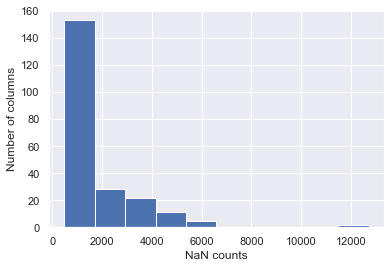

In [63]:
nan_counts=X_train.isnull().sum()
nan_counts[nan_counts>0]
numeric_cols=X_train.select_dtypes(include=['float64','int64']).columns
X_train[numeric_cols].isnull().sum().sort_values(ascending=False)

#Histogram for the NaN counts
marks=np.array(nan_counts[nan_counts>0])
fig,ax=plt.subplots(1,1)
ax.hist(marks)
ax.set_xlabel('NaN counts')
ax.set_ylabel('Number of columns')
plt.show()

In [64]:
X_train_info=pd.DataFrame(X_train.dtypes).T.rename(index={0:'column type'})
X_train_info=X_train_info.append(pd.DataFrame(X_train.isnull().sum()).T.rename(index={0:'NaN values (nb)'}))
X_train_info=X_train_info.append(pd.DataFrame(X_train.isnull().sum()/X_train.shape[0]*100).T.
                         rename(index={0:'NaN values (%)'}))
display(X_train_info)

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Class,sectorFac
column type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
NaN values (nb),600,1225,907,609,1114,842,857,562,858,714,...,2405,1298,1384,1381,1700,1497,1370,1346,0,0
NaN values (%),4.715128,9.626719,7.127701,4.785855,8.75442,6.616896,6.734774,4.416503,6.742633,5.611002,...,18.899804,10.200393,10.876228,10.852652,13.359528,11.764244,10.766208,10.577603,0.0,0.0


We drop all the columns containing more than 20% NaN values

In [65]:
percent_nan = (X_train.isnull().sum()/X_train.shape[0]*100).sort_values(ascending=False)
X_train.drop(percent_nan[percent_nan.values > 20].index.tolist(),axis='columns', inplace=True)

X_train_info_ar=pd.DataFrame(X_train.dtypes).T.rename(index={0:'column type'})
X_train_info_ar=X_train_info_ar.append(pd.DataFrame(X_train.isnull().sum()).T.rename(index={0:'null values (nb)'}))
X_train_info_ar=X_train_info_ar.append(pd.DataFrame(X_train.isnull().sum()/X_train.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(X_train_info_ar)


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Class,sectorFac
column type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
null values (nb),600,1225,907,609,1114,842,857,562,858,714,...,2405,1298,1384,1381,1700,1497,1370,1346,0,0
null values (%),4.715128,9.626719,7.127701,4.785855,8.75442,6.616896,6.734774,4.416503,6.742633,5.611002,...,18.899804,10.200393,10.876228,10.852652,13.359528,11.764244,10.766208,10.577603,0.0,0.0


We look at the 0 values in the different columns. We decide to drop all the columns containing more than 30% 0 values as there is still a chance that the value 0 contains information (e.g., no dividends paid -> 0)

In [66]:
X_train_info_null=pd.DataFrame(X_train.dtypes).T.rename(index={0:'column type'})
X_train_info_null=X_train_info_null.append(pd.DataFrame((X_train == 0).sum()).T.rename(index={0:'zero values (nb)'}))
X_train_info_null=X_train_info_null.append(pd.DataFrame((X_train == 0).sum()/X_train.shape[0]*100).T.
                         rename(index={0:'zero values (%)'}))
display(X_train_info_null)


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Class,sectorFac
column type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
zero values (nb),544,571,2557,537,7336,294,47,17,3040,16,...,6114,1893,5236,23,19,2209,7222,293,4982,532
zero values (%),4.275049,4.48723,20.094303,4.220039,57.650295,2.310413,0.369352,0.133595,23.88998,0.125737,...,48.047151,14.876228,41.147348,0.180747,0.149312,17.359528,56.75442,2.302554,39.151277,4.180747


In [67]:
null_counts=(X_train == 0).sum()
null_counts[null_counts>0]
numeric_cols=X_train.select_dtypes(include=['float64','int64']).columns
(X_train == 0).sum().sort_values(ascending=False)

Preferred Dividends                 10154
Net Income - Discontinued ops        9904
Deposit Liabilities                  9671
R&D to Revenue                       7771
Net Income - Non-Controlling int     7761
                                    ...  
pretaxProfitMargin                      1
Invested Capital                        1
Tangible Asset Value                    1
companyEquityMultiplier                 0
operatingProfitMargin                   0
Length: 170, dtype: int64

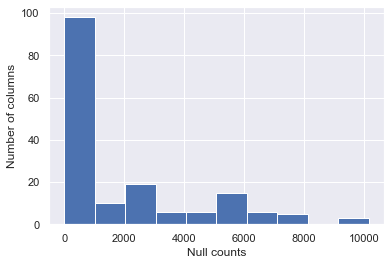

In [68]:
null_counts=(X_train == 0).sum()
null_counts[null_counts>0]
numeric_cols=X_train.select_dtypes(include=['float64','int64']).columns
(X_train == 0).sum().sort_values(ascending=False)

#Histogramm for the Null counts
marks=np.array(null_counts[null_counts>0])
fig,ax=plt.subplots(1,1)
ax.hist(marks)
ax.set_xlabel('Null counts')
ax.set_ylabel('Number of columns')
plt.show()

Here, we find evidence supporting our hypothesis, that the value 0 can contain actual information, as there are substantially less columns containing less than 10% of 0. This underlines that it makes more sense to set the border higher than for the NaN-values. 

In [69]:
percent_null = ((X_train == 0).sum()/X_train.shape[0]*100).sort_values(ascending=False)
X_train.drop(percent_null[percent_null.values > 30].index.tolist(),axis='columns', inplace=True)

X_train_info_null_ar=pd.DataFrame(X_train.dtypes).T.rename(index={0:'column type'})
X_train_info_null_ar=X_train_info_null_ar.append(pd.DataFrame((X_train == 0).sum()).T.rename(index={0:'null values (nb)'}))
X_train_info_null_ar=X_train_info_null_ar.append(pd.DataFrame((X_train == 0).sum()/X_train.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(X_train_info_null_ar)

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,EPS Diluted Growth,Weighted Average Shares Growth,Operating Cash Flow growth,Free Cash Flow growth,Receivables growth,Asset Growth,Book Value per Share Growth,Debt Growth,SG&A Expenses Growth,sectorFac
column type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
null values (nb),544,571,2557,537,294,47,17,3040,16,1674,...,155,461,30,15,1893,23,19,2209,293,532
null values (%),4.275049,4.48723,20.094303,4.220039,2.310413,0.369352,0.133595,23.88998,0.125737,13.155206,...,1.218075,3.62279,0.235756,0.117878,14.876228,0.180747,0.149312,17.359528,2.302554,4.180747


Lastly, we remove the values that have sdev 0 as they contain no useful information and raise problems for the standardisation before the PCA (as we need to devide by the stdev).

In [70]:
np.where(X_train.std()== 0)
X_train.iloc[:, 59]
X_train = X_train.drop(columns='operatingProfitMargin')


We are now left with 136 (+ 1) columns. We will now fill the missies with an imputer before detecting outliers and then filling it again with the same imputer to minimise the bias due to outliers. 

In [71]:
# SAME FOR VALIDATION SET (TRANSFORM)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# Copy X_train to X_train_imputed
X_train_imputed = X_train.select_dtypes(include =['float64']).copy()

imp_mean = IterativeImputer(random_state=0, max_iter=1)

imp_mean.fit(X_train_imputed)

X_train_imputed[:] = imp_mean.transform(X_train_imputed)



# Initialize IterativeImputer
#mice_imputer = IterativeImputer(random_state=0, max_iter=1)

# Impute using fit_tranform on training set
#X_train_imputed.iloc[:, :] = mice_imputer.fit_transform(X_train_imputed)



# Copy X_test to X_test_imputed
#X_test_imputed = X_test.select_dtypes(include =['float64']).copy()

# Impute using tranformation of training set on test set
#X_test_imputed.iloc[:, :] = mice_imputer.transform(X_test_imputed)

# Copy X_valid to X_valid_imputed
#X_valid_imputed = X_valid.select_dtypes(include =['float64']).copy()

# Impute using tranformation of training set on validation set
#X_valid_imputed.iloc[:, :] = mice_imputer.transform(X_valid_imputed)


## NWY - Outliers
first, we do a stardisation of the data to then use the mahalonobis distance to remove outliers.


In [72]:
print(sum(X_train_imputed.std()))
# Standardisation
X_train_imputed = (X_train_imputed-X_train_imputed.mean())/X_train_imputed.std()
X_train_imputed
print(X_train_imputed)

92956445044974.38
             Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
Tickers                                                               
PG-2014     1.981233       -0.013754         1.288386      3.628037   
VIPS-2014  -0.043951       -0.011253        -0.017369     -0.112400   
KR-2014     2.668284       -0.013574         2.698086      1.984492   
RAD-2014    0.580576       -0.013600         0.537638      0.582117   
GIS-2014    0.362291       -0.013596         0.297466      0.478520   
...              ...             ...              ...           ...   
TSRI-2016  -0.149217       -0.013485        -0.116662     -0.212155   
TZOO-2016  -0.147691       -0.013768        -0.118002     -0.202333   
USATP-2016 -0.148759        0.000063        -0.116519     -0.210848   
WSTG-2016  -0.146248       -0.014755        -0.113553     -0.210269   
WTT-2016   -0.150068       -0.013719        -0.117847     -0.211807   

            SG&A Expense  Operating Expenses  Operating In

In [73]:
import numpy as np
import pandas as pd 
import scipy as stats

def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

#create new column in dataframe that contains Mahalanobis distance for each row
X_train_imputed['mahalanobis'] = mahalanobis(x=X_train_imputed, data=X_train_imputed)

#display first five rows of dataframe
X_train_imputed.head()

from scipy.stats import chi2

#calculate p-value for each mahalanobis distance 
X_train_imputed['p'] = 1 - chi2.cdf(X_train_imputed['mahalanobis'], 130)

#display p-values for first five rows in dataframe
X_train_imputed



,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Weighted Average Shares Growth,Operating Cash Flow growth,Free Cash Flow growth,Receivables growth,Asset Growth,Book Value per Share Growth,Debt Growth,SG&A Expenses Growth,mahalanobis,p
Tickers,,,,,,,,,,,,,,,,,,,,,
PG-2014,1.981233,-0.013754,1.288386,3.628037,3.660282,3.044198,2.113462,0.557116,4.044169,0.390297,...,-0.012316,-0.001564,-0.001085,0.002552,-0.000412,-0.011074,-0.015404,-0.001453,257.750591,1.859969e-10
VIPS-2014,-0.043951,-0.011253,-0.017369,-0.112400,-0.099648,-0.087037,-0.083997,-0.074170,-0.098695,-0.002509,...,-0.012315,-0.001563,-0.001086,0.003966,-0.000304,-0.011061,-0.013617,0.003794,1.004833,1.000000e+00
KR-2014,2.668284,-0.013574,2.698086,1.984492,2.544777,2.445891,0.329226,0.316143,0.507349,0.096891,...,-0.012317,-0.001563,-0.001082,0.002612,-0.000386,-0.011071,-0.015288,-0.000908,73.115023,9.999861e-01
RAD-2014,0.580576,-0.013600,0.537638,0.582117,1.007314,0.790584,0.012139,0.299466,-0.077043,-0.007924,...,-0.012312,-0.001564,-0.001086,0.002582,-0.000422,-0.011072,-0.015532,-0.000989,15.924340,1.000000e+00
GIS-2014,0.362291,-0.013596,0.297466,0.478520,0.457688,0.309684,0.366298,0.188772,0.633991,0.115376,...,-0.012318,-0.001564,-0.001085,0.002585,-0.000415,-0.011074,-0.015419,-0.001033,13.196345,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSRI-2016,-0.149217,-0.013485,-0.116662,-0.212155,-0.159300,-0.205941,-0.105334,-0.085176,-0.149211,-0.007982,...,-0.012316,-0.001562,-0.001080,0.002478,-0.000418,-0.011074,-0.015497,-0.000899,8.438018,1.000000e+00
TZOO-2016,-0.147691,-0.013768,-0.118002,-0.202333,-0.146479,-0.193654,-0.103843,-0.085176,-0.146366,-0.007478,...,-0.012318,-0.001561,-0.001075,0.002476,-0.000456,-0.011076,-0.016259,-0.001238,2.282442,1.000000e+00
USATP-2016,-0.148759,0.000063,-0.116519,-0.210848,-0.157006,-0.203838,-0.105627,-0.084270,-0.151465,-0.008176,...,-0.001636,-0.001347,-0.001203,0.000266,0.001026,-0.001946,-0.001760,-0.000652,3.923787,1.000000e+00


Typically a p-value that is less than .001 is considered to be an outlier. Thus, we drop such outliers as a whole row.

In [74]:
X_train_imputed = X_train_imputed.drop(X_train_imputed[X_train_imputed.p < 0.001].index).copy()
ticker_X_train = X_train_imputed.iloc[: , -2:]
ticker_X_train

,mahalanobis,p
Tickers,,
VIPS-2014,1.004833,1.000000
KR-2014,73.115023,0.999986
RAD-2014,15.924340,1.000000
GIS-2014,13.196345,1.000000
PM-2014,109.408748,0.904820
...,...,...
TSRI-2016,8.438018,1.000000
TZOO-2016,2.282442,1.000000
USATP-2016,3.923787,1.000000


We have successfully dropped ca. 800 Outlier rows. We will now again use an imputer to fill the missing values without the outliers in the dataset.

In [75]:
X_train = X_train.join(ticker_X_train)
X_train = X_train.dropna(subset=['p'])
X_train.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Operating Cash Flow growth,Free Cash Flow growth,Receivables growth,Asset Growth,Book Value per Share Growth,Debt Growth,SG&A Expenses Growth,sectorFac,mahalanobis,p
Tickers,,,,,,,,,,,,,,,,,,,,,
VIPS-2014,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,3.955957e+07,...,0.2134,-0.3626,NaN,NaN,NaN,NaN,1.7313,0,1.004833,1.000000
KR-2014,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,7.510000e+08,...,0.2095,0.3935,0.0618,0.1886,0.3268,0.2738,0.0234,0,73.115023,0.999986
RAD-2014,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,2.502180e+08,8.040000e+05,...,-0.1434,-0.2691,0.0211,-0.0189,0.1963,-0.0458,-0.0060,0,15.924340,1.000000
GIS-2014,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,2.707700e+09,8.833000e+08,...,-0.1316,-0.1936,0.0257,0.0215,0.0274,0.1025,-0.0220,0,13.196345,1.000000
PM-2014,8.010600e+10,0.0010,6.077500e+10,1.933100e+10,7.001000e+09,7.629000e+09,1.170200e+10,1.052000e+09,1.059000e+10,3.097000e+09,...,-0.2364,-0.2629,0.0392,-0.0781,-0.6769,0.0642,0.0161,0,109.408748,0.904820


In [76]:
# Copy X_train to X_train_imputed
X_train_new = X_train.select_dtypes(include =['float64']).copy()

imp_mean = IterativeImputer(random_state=0, max_iter=1)

imp_mean.fit(X_train_new)

X_train_new[:] = imp_mean.transform(X_train_new)



# Copy X_test to X_test_imputed
#X_test_imputed = X_test.select_dtypes(include =['float64']).copy()

# Impute using tranformation of training set on test set
#X_test_imputed.iloc[:, :] = imp_mean.transform(X_test_imputed)

# Copy X_valid to X_valid_imputed
#X_valid_imputed = X_valid.select_dtypes(include =['float64']).copy()

# Impute using tranformation of training set on validation set
#X_valid_imputed.iloc[:, :] = imp_mean.transform(X_valid_imputed)


In [77]:
## Feature Selection
X_train_new

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Weighted Average Shares Growth,Operating Cash Flow growth,Free Cash Flow growth,Receivables growth,Asset Growth,Book Value per Share Growth,Debt Growth,SG&A Expenses Growth,mahalanobis,p
Tickers,,,,,,,,,,,,,,,,,,,,,
VIPS-2014,3.734148e+09,1.173700,2.805625e+09,9.285226e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,3.955957e+07,...,0.01840,0.213400,-0.362600,0.028636,1.557993,0.290576,2.581357,1.731300,1.004833,1.000000
KR-2014,9.837500e+10,0.018200,7.813800e+10,2.023700e+10,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,7.510000e+08,...,-0.03560,0.209500,0.393500,0.061800,0.188600,0.326800,0.273800,0.023400,73.115023,0.999986
RAD-2014,2.552641e+10,0.005300,1.820268e+10,7.323734e+09,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,2.502180e+08,8.040000e+05,...,0.06940,-0.143400,-0.269100,0.021100,-0.018900,0.196300,-0.045800,-0.006000,15.924340,1.000000
GIS-2014,1.790960e+10,0.007600,1.153980e+10,6.369800e+09,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,2.707700e+09,8.833000e+08,...,-0.04680,-0.131600,-0.193600,0.025700,0.021500,0.027400,0.102500,-0.022000,13.196345,1.000000
PM-2014,8.010600e+10,0.001000,6.077500e+10,1.933100e+10,7.001000e+09,7.629000e+09,1.170200e+10,1.052000e+09,1.059000e+10,3.097000e+09,...,-0.03020,-0.236400,-0.262900,0.039200,-0.078100,-0.676900,0.064200,0.016100,109.408748,0.904820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSRI-2016,6.099828e+07,0.062600,5.103888e+07,9.959402e+06,9.120526e+06,9.120526e+06,8.388760e+05,0.000000e+00,7.882260e+05,3.890000e+05,...,0.00000,0.720800,0.766800,-0.119100,0.002700,0.044100,0.000000,0.026700,8.438018,1.000000
TZOO-2016,1.142630e+08,-0.078200,1.385500e+07,1.004080e+08,8.112600e+07,9.022200e+07,1.018600e+07,0.000000e+00,1.062300e+07,3.992000e+06,...,-0.04920,1.080600,1.684900,-0.120900,-0.219400,-0.111500,-1.000000,-0.096400,2.282442,1.000000
USATP-2016,7.700000e+07,8.822405,5.500000e+07,2.200000e+07,2.200000e+07,2.300000e+07,-1.000000e+06,1.000000e+06,-7.000000e+06,-1.000000e+06,...,-0.77567,-0.496001,-2.265537,0.014658,0.475897,-0.105548,2.162048,0.007099,3.923787,1.000000


In [78]:
y_train = pd.merge(y_train, ticker_X_train, how="outer", on = "Tickers")
y_train = y_train.dropna(subset=['mahalanobis'])
y_train = y_train.drop('mahalanobis', 1)
y_train = y_train.drop('p', 1)
y_train

,STRATEGY
Tickers,
VIPS-2014,-1
KR-2014,1
RAD-2014,1
GIS-2014,1
PM-2014,1
...,...
TSRI-2016,-1
TZOO-2016,-1
USATP-2016,-1


In [79]:
y_train=y_train.astype('int')

In [80]:
feat_labels = X_train_new.columns.copy()
X_train_fs = X_train_new.copy()
# Create Random Forest object, fit data and
# extract feature importance attributes
forest = RandomForestClassifier(random_state=1) 
forest.fit(X_train_fs, y_train) 
importances = forest.feature_importances_

# print top 30 features
indices = np.argsort(importances)[::-1]
n = 30
for i in range(n):
    print('{0:2d}) {1:7s} {2:6.4f}'
        .format(i + 1, feat_labels[indices[i]], 
            importances[indices[i]]))
 

 1) Earnings Yield 0.0122
 2) Free Cash Flow Yield 0.0095
 3) priceFairValue 0.0094
 4) Free Cash Flow growth 0.0093
 5) capitalExpenditureCoverageRatios 0.0093
 6) Operating Income Growth 0.0092
 7) Asset Growth 0.0092
 8) Net cash flow / Change in cash 0.0092
 9) SG&A Expenses Growth 0.0092
10) Operating Cash Flow growth 0.0091
11) Free Cash Flow margin 0.0091
12) Book Value per Share Growth 0.0091
13) freeCashFlowPerShare 0.0091
14) Revenue Growth 0.0091
15) Price to Sales Ratio 0.0090
16) mahalanobis 0.0090
17) Issuance (buybacks) of shares 0.0090
18) EPS     0.0090
19) EPS Diluted 0.0089
20) Other Liabilities 0.0089
21) Gross Profit Growth 0.0089
22) priceSalesRatio 0.0088
23) EPS Diluted Growth 0.0088
24) quickRatio 0.0087
25) Weighted Average Shares Growth 0.0087
26) Income Quality 0.0087
27) eBITperRevenue 0.0086
28) EBIT Growth 0.0086
29) currentRatio 0.0086
30) priceToSalesRatio 0.0086


In [81]:
# Get cumsum of the n most important features 
feat_imp = np.sort(importances)[::-1]
sum_feat_imp = np.cumsum(feat_imp)[:n]
 

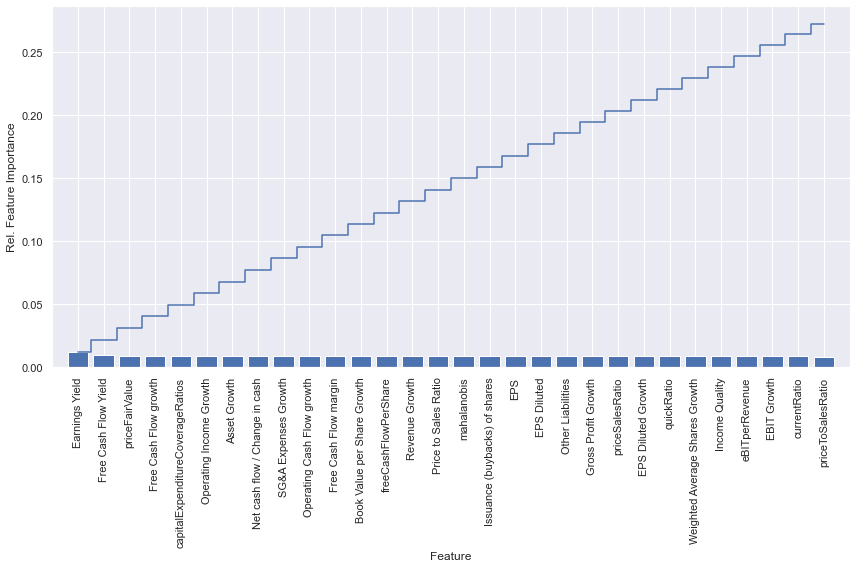

In [82]:
# Plot Feature Importance (both cumul., individual)
plt.figure(figsize=(12, 8))
plt.bar(range(n), importances[indices[:n]], align='center') 
plt.xticks(range(n), feat_labels[indices[:n]], rotation=90) 
plt.xlim([-1, n])
plt.xlabel('Feature')
plt.ylabel('Rel. Feature Importance')
plt.step(range(n), sum_feat_imp , where='mid', label='Cumulative importance')
plt.tight_layout()

In [84]:
feat_labels[indices[:n]]

Index(['Earnings Yield', 'Free Cash Flow Yield', 'priceFairValue',
       'Free Cash Flow growth', 'capitalExpenditureCoverageRatios',
       'Operating Income Growth', 'Asset Growth',
       'Net cash flow / Change in cash', 'SG&A Expenses Growth',
       'Operating Cash Flow growth', 'Free Cash Flow margin',
       'Book Value per Share Growth', 'freeCashFlowPerShare', 'Revenue Growth',
       'Price to Sales Ratio', 'mahalanobis', 'Issuance (buybacks) of shares',
       'EPS', 'EPS Diluted', 'Other Liabilities', 'Gross Profit Growth',
       'priceSalesRatio', 'EPS Diluted Growth', 'quickRatio',
       'Weighted Average Shares Growth', 'Income Quality', 'eBITperRevenue',
       'EBIT Growth', 'currentRatio', 'priceToSalesRatio'],
      dtype='object')

In [85]:

X_train = X_train_new[['Earnings Yield', 'Free Cash Flow Yield', 'priceFairValue',
       'Free Cash Flow growth', 'capitalExpenditureCoverageRatios',
       'Operating Income Growth', 'Asset Growth',
       'Net cash flow / Change in cash', 'SG&A Expenses Growth',
       'Operating Cash Flow growth', 'Free Cash Flow margin',
       'Book Value per Share Growth', 'freeCashFlowPerShare', 'Revenue Growth',
       'Price to Sales Ratio', 'mahalanobis', 'Issuance (buybacks) of shares',
       'EPS', 'EPS Diluted', 'Other Liabilities', 'Gross Profit Growth',
       'priceSalesRatio', 'EPS Diluted Growth', 'quickRatio',
       'Weighted Average Shares Growth', 'Income Quality', 'eBITperRevenue',
       'EBIT Growth', 'currentRatio', 'priceToSalesRatio']].copy()

In [86]:
X_train

,Earnings Yield,Free Cash Flow Yield,priceFairValue,Free Cash Flow growth,capitalExpenditureCoverageRatios,Operating Income Growth,Asset Growth,Net cash flow / Change in cash,SG&A Expenses Growth,Operating Cash Flow growth,...,Gross Profit Growth,priceSalesRatio,EPS Diluted Growth,quickRatio,Weighted Average Shares Growth,Income Quality,eBITperRevenue,EBIT Growth,currentRatio,priceToSalesRatio
Tickers,,,,,,,,,,,,,,,,,,,,,
VIPS-2014,0.012300,0.144982,0.866869,-0.362600,1.997484,1.946300,1.557993,4.463169e+08,1.731300,0.213400,...,1.24890,0.095727,1.464600,0.849993,0.01840,3.878200,0.050221,1.614200,0.21020,0.044300
KR-2014,0.083100,0.068000,0.000000,0.393500,1.533476,-0.014100,0.188600,1.630000e+08,0.023400,0.209500,...,0.01730,0.000000,0.046900,0.141709,-0.03560,2.352200,0.027578,-0.014500,0.82500,0.185800
RAD-2014,0.035000,0.057900,-2.655832,-0.269100,2.102753,0.111300,-0.018900,1.695400e+07,-0.006000,-0.143400,...,0.00070,0.000000,0.916700,0.436885,0.06940,3.259000,0.026436,0.290400,1.70900,0.249100
GIS-2014,0.053500,0.056500,4.258726,-0.193600,3.868169,0.037000,0.021500,1.259000e+08,-0.022000,-0.131600,...,-0.00840,1.553911,0.014300,0.433465,-0.04680,1.392800,0.168072,0.033200,0.81000,1.861000
PM-2014,0.058400,0.052000,33.449653,-0.262900,6.712056,-0.134100,-0.078100,-4.720000e+08,0.016100,-0.236400,...,-0.07090,1.299472,-0.095100,0.376257,-0.03020,1.032800,0.145332,-0.119300,1.02500,1.579800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSRI-2016,0.052600,0.163100,0.790326,0.766800,103.772819,0.939800,0.002700,8.443670e+05,0.026700,0.720800,...,0.06910,0.122205,1.000000,2.984279,0.00000,3.075600,0.012922,1.286600,3.03300,0.122200
TZOO-2016,0.047000,0.056500,7.748561,1.684900,9.595160,1.666500,-0.219400,-8.325000e+06,-0.096400,1.080600,...,-0.05110,1.224981,-0.364900,1.425410,-0.04920,1.315300,0.092970,1.159600,1.49100,1.210000
USATP-2016,-0.299012,-2.130555,214.735365,-2.265537,-17.996590,0.128859,0.475897,8.000000e+06,0.007099,-0.496001,...,0.37874,259.367553,0.040032,-7.898979,-0.77567,2.225367,-2.114048,-0.188521,64.44062,23.284586
